## Testing toy problem with a combination of 3 polynimials

### Simple combination of 3 loss and optimization from multiple starting points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

np.random.seed(0)

# Define three polynomial loss functions of different degrees (single variable)
def loss_1(x):
    return x*np.cos(x) - x**3 + np.sin(x) 

def loss_2(x):
    return 5*np.sin(x) + 5*x**3 - np.cos(x)*np.exp(x)

def loss_3(x):
    return -4*x**4*np.cos(x) + np.sin(x)*np.exp(-x)

def combined_loss(x, lambdas):
    if not np.isclose(np.sum(lambdas), 1.0) or np.any(lambdas) < 0:
        raise ValueError("lambdas must be non-negative and sum to 1")
    
    return lambdas[0] * loss_1(x) + lambdas[1] * loss_2(x) + lambdas[2] * loss_3(x)

def optimize_for_lambda(lambdas, x_range=(-2, 2)):
    objective = lambda x: combined_loss(x[0], lambdas)
    
    # Use multiple starting points to avoid local minima
    starting_points = np.linspace(x_range[0], x_range[1], 10)
    best_result = None
    lowest_loss = float('inf')
    
    for start in starting_points:
        result = minimize(objective, [start], bounds=[x_range])
        if result.fun < lowest_loss:
            lowest_loss = result.fun
            best_result = result
    
    return best_result.x[0], best_result.fun



### Problem surface plot functions

In [2]:
def plot_loss_functions():
    """
    Plot all three individual loss functions to visualize their behavior
    """
    x = np.linspace(-1, 1, 1000)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, [loss_1(xi) for xi in x], label='Loss 1 (Degree 2)')
    plt.plot(x, [loss_2(xi) for xi in x], label='Loss 2 (Degree 3)')
    plt.plot(x, [loss_3(xi) for xi in x], label='Loss 3 (Degree 5)')
    
    plt.xlabel('x')
    plt.ylabel('Loss')
    plt.title('Individual Polynomial Loss Functions')
    plt.legend()
    plt.grid(True)
    plt.savefig('polynomial_loss_functions.png', dpi=300)
    plt.close()

def plot_optimal_loss_surface():
    """
    Plot the 3D surface where:
    - x-axis is lambda1
    - y-axis is lambda2 
    - z-axis is the optimal loss value
    
    Note: lambda3 = 1 - lambda1 - lambda2
    """
    # Create a grid of lambda1, lambda2 values
    resolution = 20
    lambda1_vals = np.linspace(0, 1, resolution)
    lambda2_vals = np.linspace(0, 1, resolution)
    
    # Create arrays to store results
    valid_lambda1 = []
    valid_lambda2 = []
    optimal_losses = []
    optimal_x_values = []
    
    # Calculate the optimal loss for each valid lambda combination
    for l1 in lambda1_vals:
        for l2 in lambda2_vals:
            l3 = 1 - l1 - l2
            
            # Only compute for valid lambda combinations (sum to 1 and all non-negative)
            if l3 >= 0:
                lambdas = np.array([l1, l2, l3])
                x_min, loss_min = optimize_for_lambda(lambdas)
                
                valid_lambda1.append(l1)
                valid_lambda2.append(l2)
                optimal_losses.append(loss_min)
                optimal_x_values.append(x_min)
    
    # Convert to numpy arrays
    valid_lambda1 = np.array(valid_lambda1)
    valid_lambda2 = np.array(valid_lambda2)
    optimal_losses = np.array(optimal_losses)
    optimal_x_values = np.array(optimal_x_values)
    
    # Create the 3D plot for optimal loss
    fig = plt.figure(figsize=(12, 10))
    ax1 = fig.add_subplot(111, projection='3d')
    
    # Create a triangulation for the irregular grid
    # Use a scatter plot with a continuous colormap for better visualization
    scatter1 = ax1.scatter(valid_lambda1, valid_lambda2, optimal_losses,
                         c=optimal_losses, cmap=cm.viridis, 
                         s=50, alpha=0.8)
    
    # Add a color bar
    fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=5)
    
    # Set labels and title
    ax1.set_xlabel('Lambda 1')
    ax1.set_ylabel('Lambda 2')
    ax1.set_zlabel('Optimal Loss Value')
    ax1.set_title('Optimal Loss Value for Different Lambda Combinations')
    
    plt.savefig('optimal_loss_surface.png', dpi=300)
    
    # Create a separate plot for the optimal x values
    fig2 = plt.figure(figsize=(12, 10))
    ax2 = fig2.add_subplot(111, projection='3d')
    
    scatter2 = ax2.scatter(valid_lambda1, valid_lambda2, optimal_x_values,
                        c=optimal_x_values, cmap=cm.plasma, 
                        s=50, alpha=0.8)
    
    fig2.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=5)
    
    ax2.set_xlabel('Lambda 1')
    ax2.set_ylabel('Lambda 2')
    ax2.set_zlabel('Optimal x Value')
    ax2.set_title('Optimal x Value for Different Lambda Combinations')
    
    plt.savefig('optimal_x_surface.png', dpi=300)
    
    # Create a filled contour plot of the lambda simplex with optimal loss as color
    fig3, ax3 = plt.subplots(figsize=(10, 8))
    
    # Use a tricontourf for the irregular grid on the 2D simplex
    tcf = ax3.tricontourf(valid_lambda1, valid_lambda2, optimal_losses, 
                       levels=20, cmap='viridis')
    
    # Add a colorbar
    fig3.colorbar(tcf, ax=ax3)
    
    # Add the simplex boundary
    ax3.plot([0, 1, 0, 0], [0, 0, 1, 0], 'k-')
    
    # Add labels for the corners of the simplex
    ax3.text(0, 0, 'λ3 = 1', fontsize=12)
    ax3.text(1, 0, 'λ1 = 1', fontsize=12)
    ax3.text(0, 1, 'λ2 = 1', fontsize=12)
    
    ax3.set_xlabel('Lambda 1')
    ax3.set_ylabel('Lambda 2')
    ax3.set_title('Optimal Loss on Lambda Simplex')
    ax3.set_aspect('equal')
    
    plt.savefig('optimal_loss_simplex.png', dpi=300)
    
    return fig, fig2, fig3

## Plot problem surface


Optimal solutions for specific lambda combinations:
--------------------------------------------------
Lambda               | Optimal x  | Optimal Loss
--------------------------------------------------
[0.33, 0.33, 0.33]   |    -1.6486 |    -8.882980
[0.80, 0.10, 0.10]   |    -1.0801 |    -1.708069
[0.10, 0.80, 0.10]   |    -2.0000 |   -32.808380
[0.10, 0.10, 0.80]   |    -1.3983 |    -7.003316


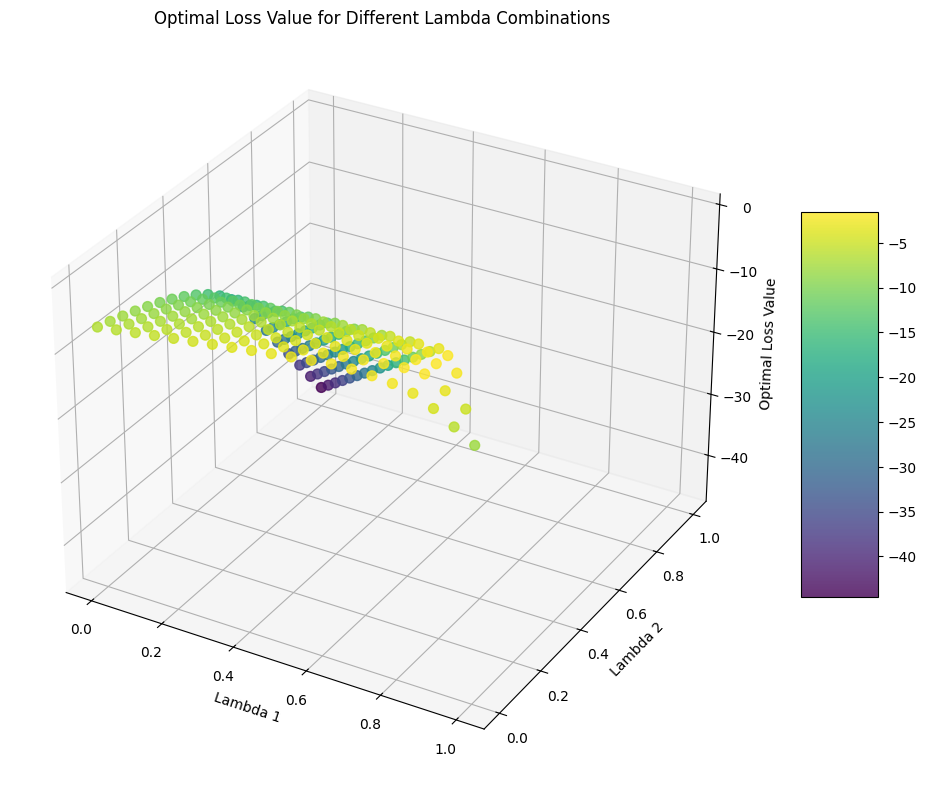

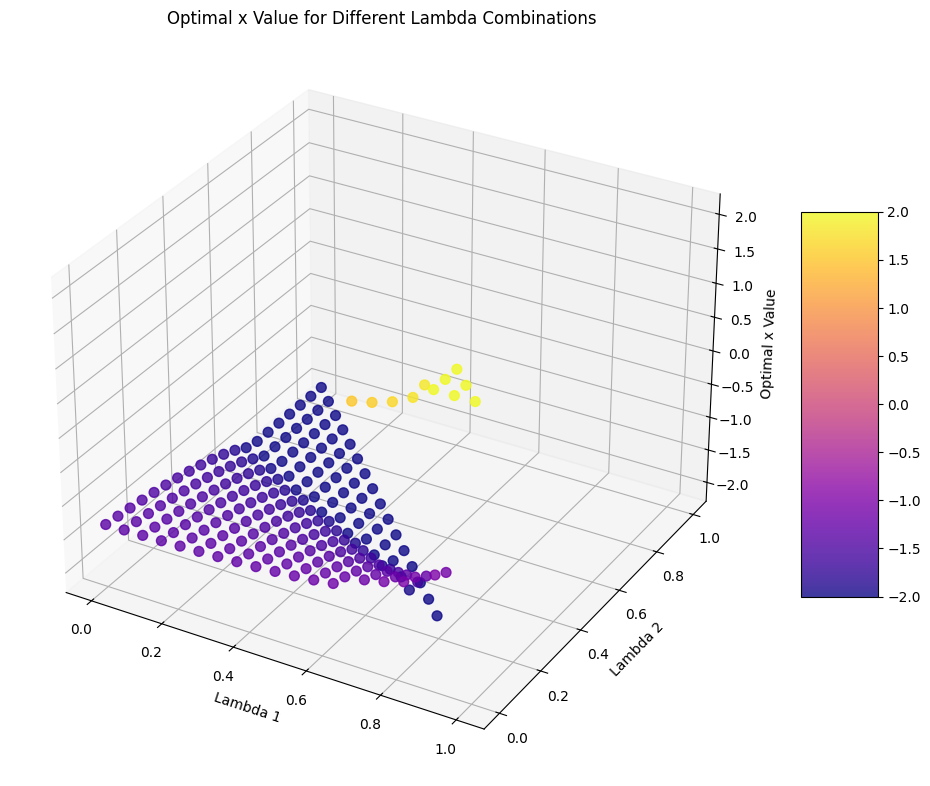

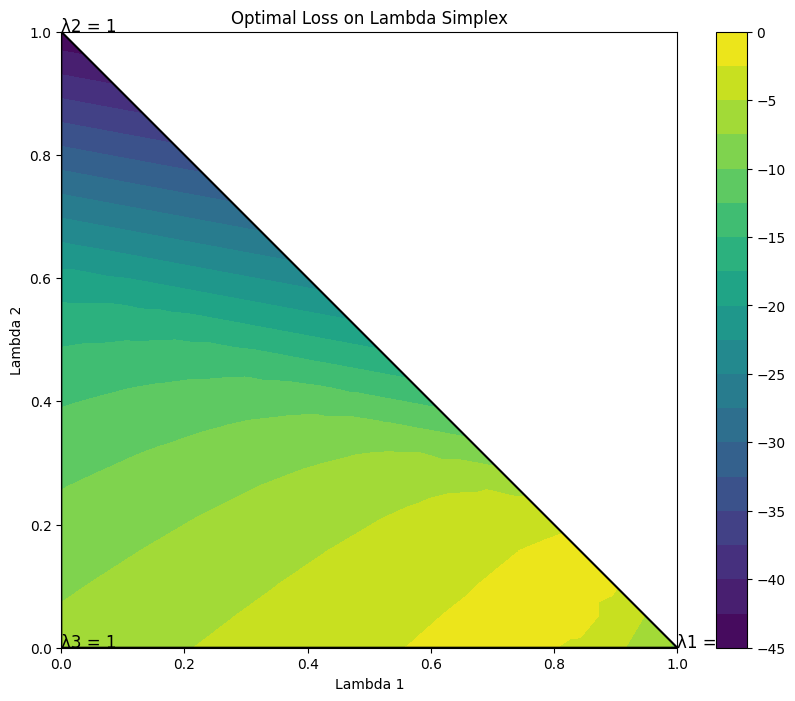

In [3]:
# Execute the code
if __name__ == "__main__":
    # First, let's look at the individual loss functions
    plot_loss_functions()
    
    # Plot the optimal loss 3D surface
    fig_loss, fig_x, fig_simplex = plot_optimal_loss_surface()
    
    # Sample a few specific lambda combinations and print their optimal values
    lambda_combinations = [
        [1/3, 1/3, 1/3],  # Equal weights
        [0.8, 0.1, 0.1],   # Mostly loss_1
        [0.1, 0.8, 0.1],   # Mostly loss_2
        [0.1, 0.1, 0.8]    # Mostly loss_3
    ]
    
    print("\nOptimal solutions for specific lambda combinations:")
    print("-" * 50)
    print(f"{'Lambda':20s} | {'Optimal x':10s} | {'Optimal Loss':12s}")
    print("-" * 50)
    
    for lambdas in lambda_combinations:
        x_min, loss_min = optimize_for_lambda(lambdas)
        lambda_str = f"[{lambdas[0]:.2f}, {lambdas[1]:.2f}, {lambdas[2]:.2f}]"
        print(f"{lambda_str:20s} | {x_min:10.4f} | {loss_min:12.6f}")
    
    plt.show()

## Calculate covariance from neighbouring points

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import pandas as pd
from tqdm import tqdm


def calculate_lambda_covariance(lambdas, delta=0.01):
    """
    Calculate the covariance matrix showing how the optimal loss changes
    with small perturbations in lambda values
    
    Parameters:
    lambdas: Base lambda values [λ1, λ2, λ3] where sum is 1
    delta: Small perturbation amount for finite difference approximation
    
    Returns:
    3x3 covariance matrix
    """
    # Calculate the optimal loss at the base lambda point
    x_opt, base_loss = optimize_for_lambda(lambdas)
    
    # Store perturbed losses
    perturbed_losses = np.zeros((3, 3))
    
    # For each pair of lambdas, calculate the perturbation effect
    for i in range(3):
        for j in range(3):
            if i == j:
                # Diagonal elements - single parameter perturbation
                if i < 2:  # Only perturb λ1 and λ2 directly
                    lambda_perturbed = lambdas.copy()
                    # Add delta to λi and subtract from λ3 to maintain sum=1
                    lambda_perturbed[i] += delta
                    lambda_perturbed[2] -= delta
                    
                    # Make sure we're still in the valid simplex
                    if np.all(lambda_perturbed >= 0):
                        x_pert, pert_loss = optimize_for_lambda(lambda_perturbed)
                        perturbed_losses[i, i] = (pert_loss - base_loss) / delta
                    else:
                        # If outside simplex, use a smaller delta in the opposite direction
                        lambda_perturbed = lambdas.copy()
                        lambda_perturbed[i] -= delta
                        lambda_perturbed[2] += delta
                        
                        if np.all(lambda_perturbed >= 0):
                            x_pert, pert_loss = optimize_for_lambda(lambda_perturbed)
                            perturbed_losses[i, i] = (base_loss - pert_loss) / delta
                        else:
                            # If still outside, use a very small perturbation
                            perturbed_losses[i, i] = 0
                else:
                    # For λ3, perturb λ1 and λ2 slightly down
                    lambda_perturbed = lambdas.copy()
                    lambda_perturbed[0] -= delta/2
                    lambda_perturbed[1] -= delta/2
                    lambda_perturbed[2] += delta
                    
                    if np.all(lambda_perturbed >= 0):
                        x_pert, pert_loss = optimize_for_lambda(lambda_perturbed)
                        perturbed_losses[2, 2] = (pert_loss - base_loss) / delta
                    else:
                        perturbed_losses[2, 2] = 0
            
            elif i < 2 and j < 2:
                # Off-diagonal elements for λ1 and λ2
                # Perturb both λi and λj while maintaining sum=1
                lambda_perturbed = lambdas.copy()
                lambda_perturbed[i] += delta/2
                lambda_perturbed[j] += delta/2
                lambda_perturbed[2] -= delta
                
                if np.all(lambda_perturbed >= 0):
                    x_pert, pert_loss = optimize_for_lambda(lambda_perturbed)
                    single_i_change = perturbed_losses[i, i] * delta/2
                    single_j_change = perturbed_losses[j, j] * delta/2
                    total_change = pert_loss - base_loss
                    interaction = total_change - single_i_change - single_j_change
                    perturbed_losses[i, j] = interaction / ((delta/2) * (delta/2))
                    perturbed_losses[j, i] = perturbed_losses[i, j]  # Symmetric matrix
                else:
                    perturbed_losses[i, j] = 0
                    perturbed_losses[j, i] = 0
            
            elif i < 2 and j == 2:
                # Off-diagonal for λ1/λ3 and λ2/λ3
                lambda_perturbed = lambdas.copy()
                lambda_perturbed[i] += delta/2
                lambda_perturbed[j] += delta/2
                lambda_perturbed[1-i] -= delta  # Adjust the other parameter
                
                if np.all(lambda_perturbed >= 0):
                    x_pert, pert_loss = optimize_for_lambda(lambda_perturbed)
                    single_i_change = perturbed_losses[i, i] * delta/2
                    single_j_change = perturbed_losses[j, j] * delta/2
                    total_change = pert_loss - base_loss
                    interaction = total_change - single_i_change - single_j_change
                    perturbed_losses[i, j] = interaction / ((delta/2) * (delta/2))
                    perturbed_losses[j, i] = perturbed_losses[i, j]  # Symmetric
                else:
                    perturbed_losses[i, j] = 0
                    perturbed_losses[j, i] = 0
    
    return perturbed_losses

def sample_from_simplex(n_samples):
    return np.random.dirichlet(np.ones(3), n_samples)

def generate_lambda_covariance_samples(n_samples=1000):
    # Generate lambda samples
    lambda_samples = sample_from_simplex(n_samples)
    
    # Initialize arrays to store results
    results = []
    
    # Calculate optimal values and covariances
    for i in tqdm(range(n_samples), desc="Calculating covariances"):
        lambdas = lambda_samples[i]
        x_opt, loss_opt = optimize_for_lambda(lambdas)
        
        # Calculate covariance matrix
        cov_matrix = calculate_lambda_covariance(lambdas)
        
        # Flatten the covariance matrix for storage
        cov_flat = cov_matrix.flatten()
        
        # Store results
        results.append({
            'lambda1': lambdas[0],
            'lambda2': lambdas[1],
            'lambda3': lambdas[2],
            'x_optimal': x_opt,
            'loss_optimal': loss_opt,
            'cov_11': cov_matrix[0, 0],
            'cov_12': cov_matrix[0, 1],
            'cov_13': cov_matrix[0, 2],
            'cov_21': cov_matrix[1, 0],
            'cov_22': cov_matrix[1, 1],
            'cov_23': cov_matrix[1, 2],
            'cov_31': cov_matrix[2, 0],
            'cov_32': cov_matrix[2, 1],
            'cov_33': cov_matrix[2, 2],
            'sensitivity_norm': np.linalg.norm(cov_matrix)
        })
    return pd.DataFrame(results)


## Code for visualization of covariance norms

In [5]:
def visualize_covariance_results(df):
    """
    Create visualizations for the lambda-covariance samples
    """
    # 1. Plot the sensitivity norm on the simplex
    fig1, ax1 = plt.subplots(figsize=(10, 8))
    scatter = ax1.scatter(df['lambda1'], df['lambda2'], c=df['sensitivity_norm'], 
                          cmap='viridis', s=30, alpha=0.7)
    plt.colorbar(scatter, label='Sensitivity Norm (Covariance Matrix)')
    
    # Add the simplex boundary
    ax1.plot([0, 1, 0, 0], [0, 0, 1, 0], 'k-')
    
    # Add labels
    ax1.text(0, 0, 'λ3 = 1', fontsize=12)
    ax1.text(1, 0, 'λ1 = 1', fontsize=12)
    ax1.text(0, 1, 'λ2 = 1', fontsize=12)
    
    ax1.set_xlabel('Lambda 1')
    ax1.set_ylabel('Lambda 2')
    ax1.set_title('Sensitivity of Optimal Loss to Lambda Perturbations')
    ax1.set_aspect('equal')
    
    plt.savefig('sensitivity_norm_simplex.png', dpi=300)
    
    # 2. Histogram of sensitivity norms
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.hist(df['sensitivity_norm'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.set_xlabel('Sensitivity Norm')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of Sensitivity Norms')
    
    plt.savefig('sensitivity_norm_histogram.png', dpi=300)
    
    # 3. 3D scatter plot of lambdas and sensitivity
    fig3 = plt.figure(figsize=(12, 10))
    ax3 = fig3.add_subplot(111, projection='3d')
    
    scatter3 = ax3.scatter(df['lambda1'], df['lambda2'], df['sensitivity_norm'],
                          c=df['loss_optimal'], cmap='plasma', s=30, alpha=0.7)
    
    ax3.set_xlabel('Lambda 1')
    ax3.set_ylabel('Lambda 2')
    ax3.set_zlabel('Sensitivity Norm')
    ax3.set_title('Lambda Values, Sensitivity, and Optimal Loss')
    
    fig3.colorbar(scatter3, ax=ax3, label='Optimal Loss')
    
    plt.savefig('lambda_sensitivity_3d.png', dpi=300)
    
    return fig1, fig2, fig3

## Dataset generation and plotting samples


Generating 1000 lambda-covariance samples...


Calculating covariances: 100%|██████████| 1000/1000 [01:25<00:00, 11.71it/s]


Saved 1000 lambda-covariance samples to lambda_covariance_samples.csv
Creating visualizations...

Summary statistics of sensitivity norms:
count     1000.000000
mean     20878.004529
std      13846.439282
min       3318.497787
25%       9079.710400
50%      14216.935993
75%      39768.417628
max      41294.162395
Name: sensitivity_norm, dtype: float64


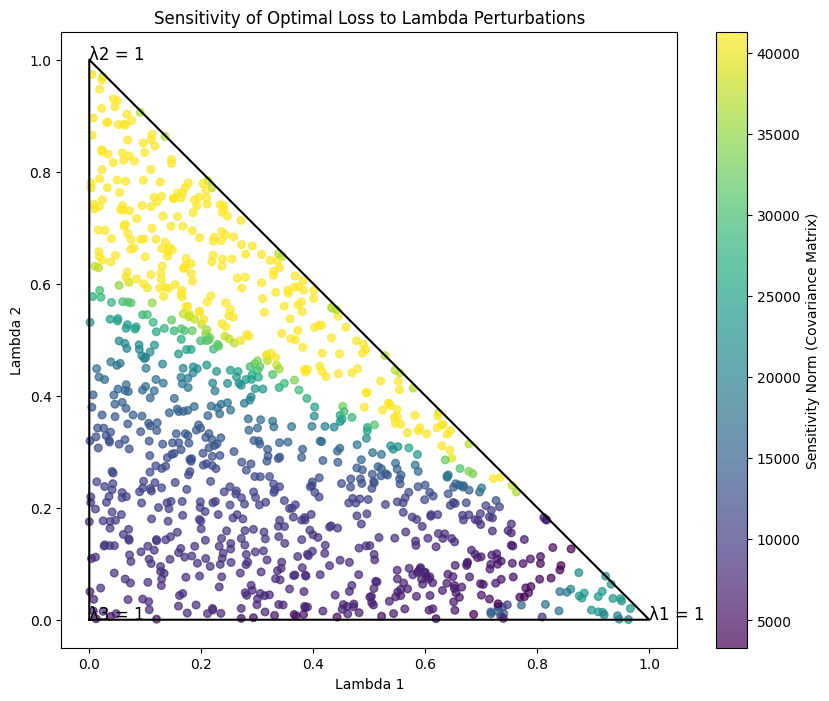

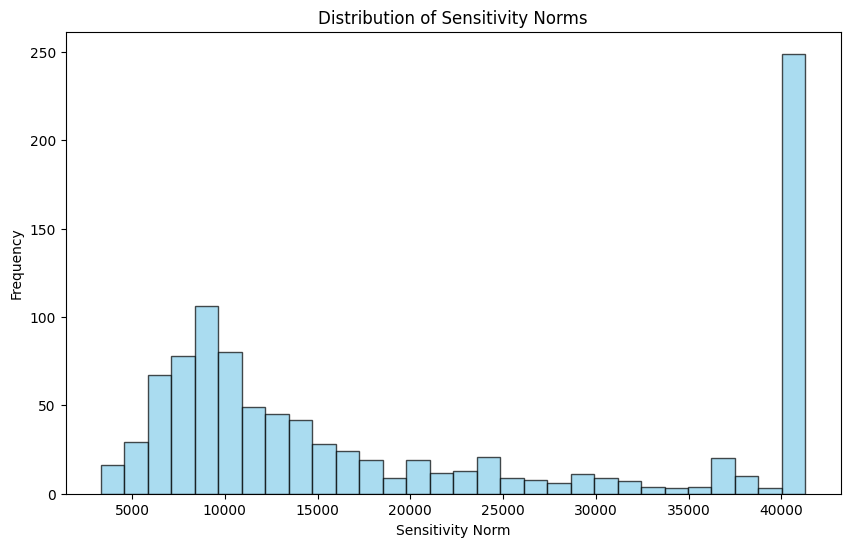

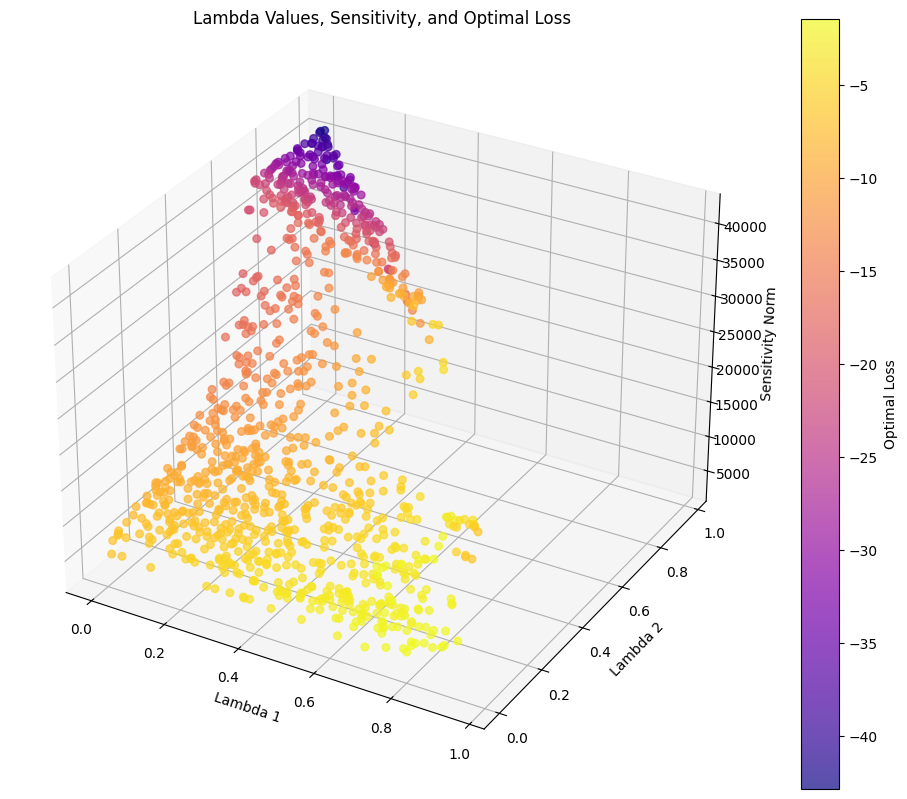

In [6]:
if __name__ == "__main__":
    
    # Generate samples of lambda and covariance pairs
    print("\nGenerating 1000 lambda-covariance samples...")
    lambda_cov_samples = generate_lambda_covariance_samples(n_samples=1000)
    
    # Save the samples to CSV
    lambda_cov_samples.to_csv('lambda_covariance_samples.csv', index=False)
    print(f"Saved {len(lambda_cov_samples)} lambda-covariance samples to lambda_covariance_samples.csv")
    
    # Visualize the results
    print("Creating visualizations...")
    visualize_covariance_results(lambda_cov_samples)
    
    # Display summary statistics
    print("\nSummary statistics of sensitivity norms:")
    print(lambda_cov_samples['sensitivity_norm'].describe())
    
    # Show the plots
    plt.show()

## Model fitting and evaluation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    RBF, Matern, WhiteKernel, ConstantKernel, RationalQuadratic, ExpSineSquared
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Load the data generated by the previous script
def load_lambda_covariance_data(file_path='lambda_covariance_samples.csv'):
    """Load the lambda-covariance data from CSV file"""
    return pd.read_csv(file_path)

def fit_gp_model(data, n_training=100, random_state=42):
    """
    Fit a Gaussian Process model to predict sensitivity_norm from lambda values
    using a state-of-the-art kernel configuration with learnable parameters.
    
    Parameters:
    data: DataFrame with lambda and sensitivity data
    n_training: Number of samples to use for training
    random_state: Random seed for reproducibility
    
    Returns:
    model: Fitted GP model
    X_train, X_test: Training and test feature sets
    y_train, y_test: Training and test target values
    scaler_X, scaler_y: Data scalers
    """
    # Extract features (lambda values) and target (sensitivity norm)
    X = data[['lambda1', 'lambda2']].values  # lambda3 is redundant (sum to 1)
    y = data['sensitivity_norm'].values.reshape(-1, 1)
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=n_training, random_state=random_state
    )
    
    # Scale the data
    scaler_X = StandardScaler().fit(X_train)
    scaler_y = StandardScaler().fit(y_train)
    
    X_train_scaled = scaler_X.transform(X_train)
    y_train_scaled = scaler_y.transform(y_train)
    
    # Define a state-of-the-art kernel combination:
    
    # 1. Amplitude component - scales the overall variance
    amplitude = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.01, 10.0))
    
    # 2. RBF kernel with automatic relevance determination (ARD)
    # Individual length scale for each dimension to capture different importance 
    rbf = RBF(length_scale=[1.0, 1.0], length_scale_bounds=(0.01, 10.0))
    
    # 3. Rational Quadratic kernel - handles multiple length scales
    # Better than RBF for modeling functions with varying smoothness
    rational_quad = RationalQuadratic(length_scale=1.0, alpha=0.5, 
                                     length_scale_bounds=(0.01, 10.0),
                                     alpha_bounds=(0.1, 10.0))
    
    # 4. Matérn kernel - can model less smooth functions than RBF
    # nu=1.5 is less smooth than the standard nu=2.5
    matern = Matern(length_scale=[1.0, 1.0], nu=1.5, 
                  length_scale_bounds=(0.01, 10.0))
    
    # 5. WhiteKernel - represents the noise in the data (fully learnable)
    noise = WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-10, 1.0))
    
    # Combine the kernels
    # The sum of kernels allows for modeling different aspects of the data
    # The product with amplitude scales everything appropriately
    #kernel = amplitude * (0.5 * rbf + 0.3 * rational_quad + 0.2 * matern) + noise
    #kernel = amplitude * (0.5 * rbf + 0.2 * matern) + noise
    kernel = amplitude * (0.5 * rbf) + noise
    
    print("Initial kernel configuration:")
    print(kernel)
    
    # Create and fit the GP model
    model = GaussianProcessRegressor(
        kernel=kernel,
        alpha=1e-10,  # Small alpha for numerical stability
        normalize_y=False,  # We already scaled the data
        n_restarts_optimizer=15,  # More restarts to find better hyperparameters
        random_state=random_state
    )
    
    # Fit the model
    print("\nFitting Gaussian Process model with optimized kernel...")
    model.fit(X_train_scaled, y_train_scaled)
    
    print(f"\nOptimized kernel parameters:")
    print(model.kernel_)
    
    # Print the learned noise level
    if hasattr(model.kernel_, 'k2') and hasattr(model.kernel_.k2, 'noise_level'):
        print(f"\nLearned noise level: {model.kernel_.k2.noise_level:.6f}")
    else:
        # Navigate the kernel structure to find the WhiteKernel
        for param_name, param in model.kernel_.get_params().items():
            if isinstance(param, WhiteKernel):
                print(f"\nLearned noise level: {param.noise_level:.6f}")
    
    # Log marginal likelihood (higher is better)
    print(f"\nLog marginal likelihood: {model.log_marginal_likelihood(model.kernel_.theta):.4f}")
    
    return model, X_train, X_test, y_train, y_test, scaler_X, scaler_y

def evaluate_model(model, X_test, y_test, scaler_X, scaler_y):
    """
    Evaluate the GP model on test data
    
    Returns:
    y_pred: Predicted values
    metrics: Dictionary of evaluation metrics
    """
    # Scale the test data
    X_test_scaled = scaler_X.transform(X_test)
    
    # Make predictions
    y_pred_scaled, y_std_scaled = model.predict(X_test_scaled, return_std=True)
    
    # Unscale the predictions
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_std = y_std_scaled * scaler_y.scale_
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }
    
    return y_pred, y_std, metrics

## Plotting fitted model

In [8]:


def plot_gp_surface_with_test_points(model, X_train, X_test, y_train, y_test, y_pred, 
                                    y_std, scaler_X, scaler_y):
    """
    Plot the GP model surface and the test points
    """
    # Create a grid for the lambda simplex
    resolution = 50
    l1 = np.linspace(0, 1, resolution)
    l2 = np.linspace(0, 1, resolution)
    L1, L2 = np.meshgrid(l1, l2)
    
    # Filter out points outside the simplex
    valid_indices = (L1 + L2 <= 1)
    
    # Create a mesh grid of lambda values
    X_mesh = np.column_stack((L1.ravel(), L2.ravel()))
    
    # Only keep points inside the simplex
    valid_points = X_mesh[np.ravel(valid_indices)]
    
    # Scale the points and predict
    X_mesh_scaled = scaler_X.transform(valid_points)
    y_mesh_scaled, y_mesh_std_scaled = model.predict(X_mesh_scaled, return_std=True)
    
    # Unscale the predictions
    y_mesh = scaler_y.inverse_transform(y_mesh_scaled.reshape(-1, 1)).ravel()
    y_mesh_std = y_mesh_std_scaled * scaler_y.scale_
    
    # Set up the 3D figure
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Reshape for plotting
    L1_valid = valid_points[:, 0].reshape((np.sum(valid_indices), 1))
    L2_valid = valid_points[:, 1].reshape((np.sum(valid_indices), 1))
    
    # Plot the GP surface using triangulation
    ax.plot_trisurf(L1_valid.ravel(), L2_valid.ravel(), y_mesh, 
                   cmap=cm.viridis, alpha=0.7, linewidth=0.2, edgecolor='gray')
    
    # Plot training points in red
    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, 
              color='red', s=5, label='Training points')
    
    # Plot test points in blue
    sc = ax.scatter(X_test[:, 0], X_test[:, 1], y_test, 
                  cmap='Reds', s=8, label='Test points')
    
    cbar = plt.colorbar(sc, ax=ax, pad=0.1)
    cbar.set_label('Absolute Error')
    
    # Set labels and title
    ax.set_xlabel('Lambda 1')
    ax.set_ylabel('Lambda 2')
    ax.set_zlabel('Sensitivity Norm')
    ax.set_title('Gaussian Process Model of Sensitivity with Test Points')
    ax.legend()
    
    plt.savefig('gp_sensitivity_surface.png', dpi=300, bbox_inches='tight')
    
    # Create a 2D plot of the model prediction on the simplex with uncertainty
    fig2, ax2 = plt.subplots(figsize=(10, 8))
    
    # Create a triangulation for plotting
    triang_plot = plt.matplotlib.tri.Triangulation(L1_valid.ravel(), L2_valid.ravel())
    
    # Plot the mean prediction
    tcf = ax2.tricontourf(triang_plot, y_mesh, levels=20, cmap='viridis')
    plt.colorbar(tcf, ax=ax2, label='Predicted Sensitivity Norm')
    
    # Plot the training and test points
    ax2.scatter(X_train[:, 0], X_train[:, 1], c='red', s=30, alpha=0.7, label='Training')
    ax2.scatter(X_test[:, 0], X_test[:, 1], c='blue', s=30, alpha=0.7, label='Test')
    
    # Add the simplex boundary
    ax2.plot([0, 1, 0, 0], [0, 0, 1, 0], 'k-')
    
    # Labels
    ax2.text(0, 0, 'λ3 = 1', fontsize=12)
    ax2.text(1, 0, 'λ1 = 1', fontsize=12)
    ax2.text(0, 1, 'λ2 = 1', fontsize=12)
    
    ax2.set_xlabel('Lambda 1')
    ax2.set_ylabel('Lambda 2')
    ax2.set_title('GP Model Prediction on Lambda Simplex')
    ax2.set_aspect('equal')
    ax2.legend()
    
    plt.savefig('gp_sensitivity_2d.png', dpi=300, bbox_inches='tight')
    
    return fig, fig2

def plot_predicted_vs_true(y_test, y_pred, y_std):
    """
    Create a scatter plot of predicted vs true sensitivity norms
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot the diagonal perfect prediction line
    max_val = max(np.max(y_test), np.max(y_pred))
    min_val = min(np.min(y_test), np.min(y_pred))
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect prediction')
    
    # Plot the predictions with error bars (95% confidence intervals)
    ax.errorbar(y_test.ravel(), y_pred.ravel(), yerr=1.96*y_std, 
                fmt='o', markersize=8, alpha=0.6, 
                ecolor='lightgray', capsize=5)
    
    # Add correlation coefficient
    correlation = np.corrcoef(y_test.ravel(), y_pred.ravel())[0, 1]
    ax.annotate(f'Correlation: {correlation:.4f}', xy=(0.05, 0.95), 
                xycoords='axes fraction', fontsize=12)
    
    # Set labels and title
    ax.set_xlabel('True Sensitivity Norm')
    ax.set_ylabel('Predicted Sensitivity Norm')
    ax.set_title('Predicted vs. True Sensitivity Norm')
    
    # Add a grid for better readability
    ax.grid(True, alpha=0.3)
    
    # Make the plot square
    ax.set_aspect('equal')
    
    plt.tight_layout()
    plt.savefig('predicted_vs_true.png', dpi=300)
    
    return fig

# Fitting model and evaluating with plots

Loading lambda-covariance data...
Loaded 1000 samples.
Initial kernel configuration:
1**2 * 0.707**2 * RBF(length_scale=[1, 1]) + WhiteKernel(noise_level=0.1)

Fitting Gaussian Process model with optimized kernel...

Optimized kernel parameters:
0.433**2 * 1.89**2 * RBF(length_scale=[0.487, 0.258]) + WhiteKernel(noise_level=0.00524)

Learned noise level: 0.005236

Log marginal likelihood: 341.4260

Model performance on test data:
MSE: 2055102.8514
RMSE: 1433.5630
MAE: 702.0703
R²: 0.9891

Creating visualizations...


C:\Users\csoho769\AppData\Local\Temp\ipykernel_24532\4074883089.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(X_test[:, 0], X_test[:, 1], y_test,



All visualizations have been saved.
Done!


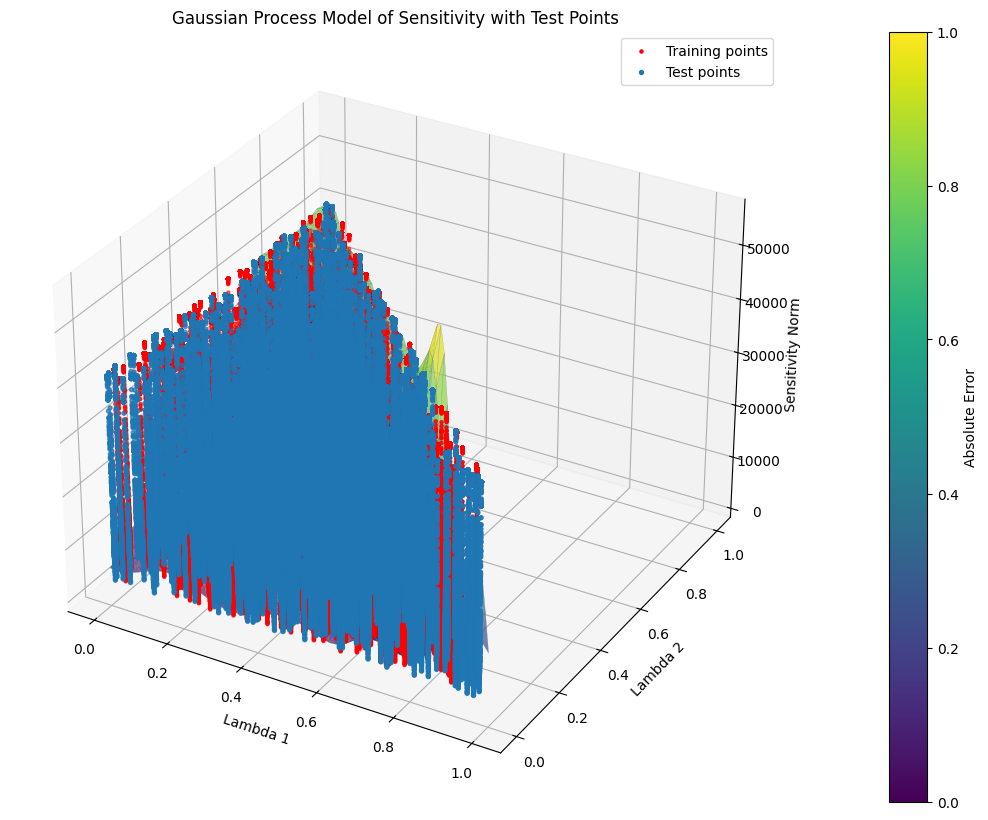

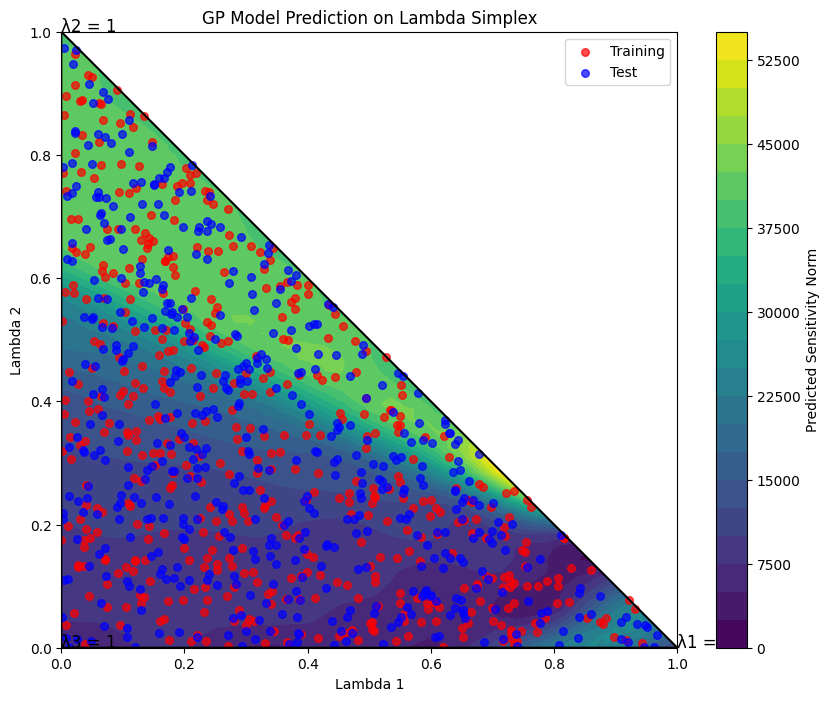

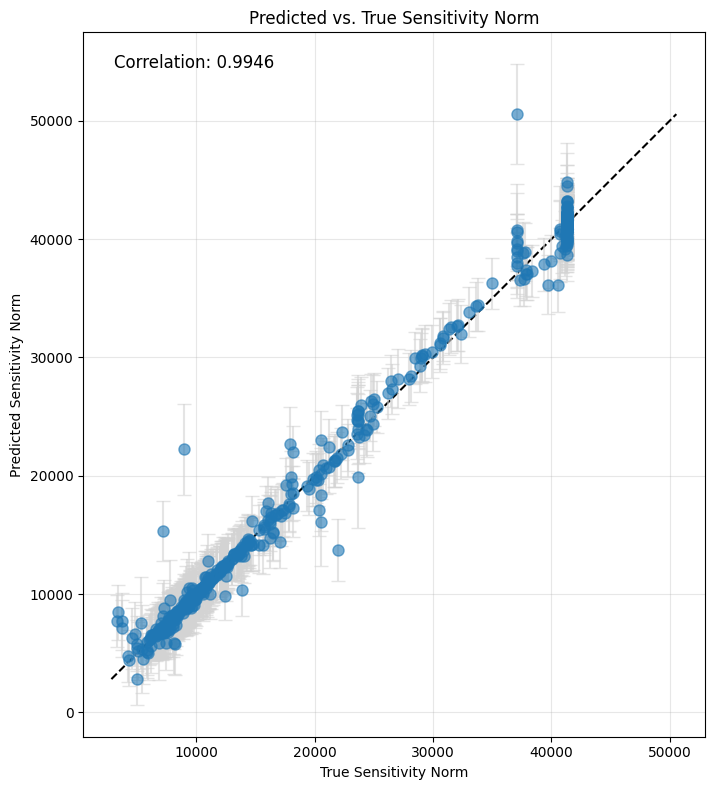

In [9]:
def main():
    """Main function to orchestrate the GP modeling and evaluation"""
    # Load the data
    print("Loading lambda-covariance data...")
    data = load_lambda_covariance_data()
    print(f"Loaded {len(data)} samples.")
    
    # Fit the GP model
    model, X_train, X_test, y_train, y_test, scaler_X, scaler_y = fit_gp_model(data, n_training=500)
    
    # Evaluate the model
    y_pred, y_std, metrics = evaluate_model(model, X_test, y_test, scaler_X, scaler_y)
    
    # Print metrics
    print("\nModel performance on test data:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Plot the GP surface with test points
    print("\nCreating visualizations...")
    plot_gp_surface_with_test_points(model, X_train, X_test, y_train, y_test, y_pred, 
                                    y_std, scaler_X, scaler_y)
    
    # Plot predicted vs true values
    plot_predicted_vs_true(y_test, y_pred, y_std)
    
    print("\nAll visualizations have been saved.")
    print("Done!")

if __name__ == "__main__":
    main()